# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"


Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [4]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [5]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1, 126, 351]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
#display(data)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   7057   9810     9568    1762              3293          1776
1  19219   1840     1658    8195               349           483
2   1210  10044    22294    1741             12638          3137

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

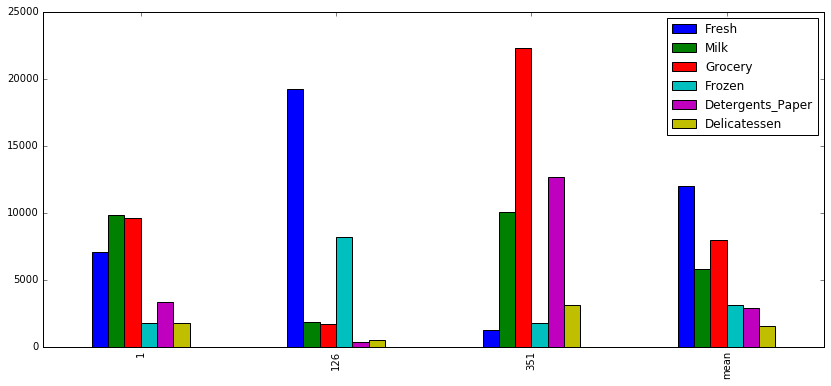

In [6]:
samples_bar = samples.append(data.describe().loc['mean'])
samples_bar.index = indices + ['mean']
_ = samples_bar.plot(kind='bar', figsize=(14,6))



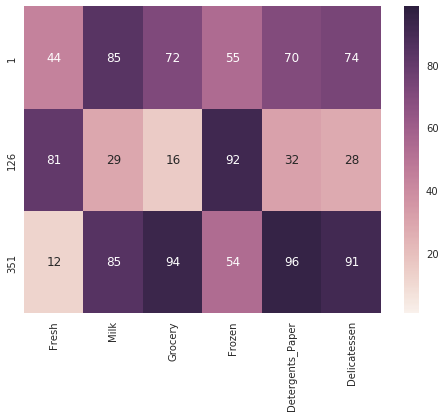

In [7]:
import seaborn as sns
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)
# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)
# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]
# Now, create the heat map using the seaborn library
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

**Answer:**

Index 0: The yearly amount spent by this customer by the product categories is in the average range, for e.g. Dollar spent on fresh is 7057 which is within 50% of the population(customers), milk is within 75% of the customers, grocery within 75% so on and so forth far below the max value. This indicates this customer is possibly a small scale retail store

Index 1: The amount spent on fresh (produce, meat, fish etc) is quite high (19219), 75% of the population spent below 16933.750000 whereas amount spent on other product categories such as milk, grocery, Frozen, Detergent Papers are quite low --- seems like subsidiaries for fresh product. It could indicate the customer coule be a local food chain or Cafe or restaurent chain

Index 2: a) Fresh - 1210, 25% of the population buy less than 3127.750000
          b) Milk - 10044, 75% of the population buys above 8504 but below 16933.75
          c) Grocery - 22294, 75% of the population buys below 7190.25, this has to be among the top buyers of Grocery
          ........
          e) Detergent - 12638 - among the top buyers
          f) Delicatessen(foreigh goods) - 3137 among the top buyers
          
The above pointers indicate this cutomer spent high on Milk, grocery, detergent, Delicatessen. The customer could be a large scale Grocery store.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [9]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

#print data
y = data['Grocery']
new_data = data.drop(['Grocery'], axis =1)
#print new_data
feature_cols = new_data.columns
#print feature_cols
x = new_data[feature_cols]



In [10]:
from sklearn.cross_validation import train_test_split

# TODO: Split the data into training and testing sets using the given feature as the target
#X_train, X_test, y_train, y_test = (None, None, None, None)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)



# TODO: Create a decision tree regressor and fit it to the training set
#regressor = None
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
regressor = DecisionTreeRegressor()
parameters = {'max_features' : [5], 
              'splitter' : ['best','random'],
             'max_depth' : range(1, 11),
             'max_features' : ['auto','sqrt','log2'],
             'min_samples_leaf' : range(1, 25),
             'random_state' : [42]}
grid_obj = GridSearchCV(regressor, parameters)


grid_obj.fit(X_train, y_train)

y_pred = grid_obj.predict(X_test)

#y_pred_train = grid_obj.predict(X_train)

# TODO: Report the score of the prediction using the testing set
#score = None

from sklearn.metrics import r2_score

print r2_score(y_test, y_pred) 

#print r2_score(y_train, y_pred_train) 

0.732559029022


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I attempted to predict "Grocery". The prediction score is .732. So, basically 73% of the time we are able to predict accurately the amount spent on Grocery based on the info we have on the amount spent on the other categories which is not so bad. We do see some correlation here between the amount spent on other products(may be single feature or muliple features) and the spent amount spent on Grocery although its not perfect. I feel we don't need to have this feature for identifying customer's spending habits as it definitely has some correlation with some other features.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

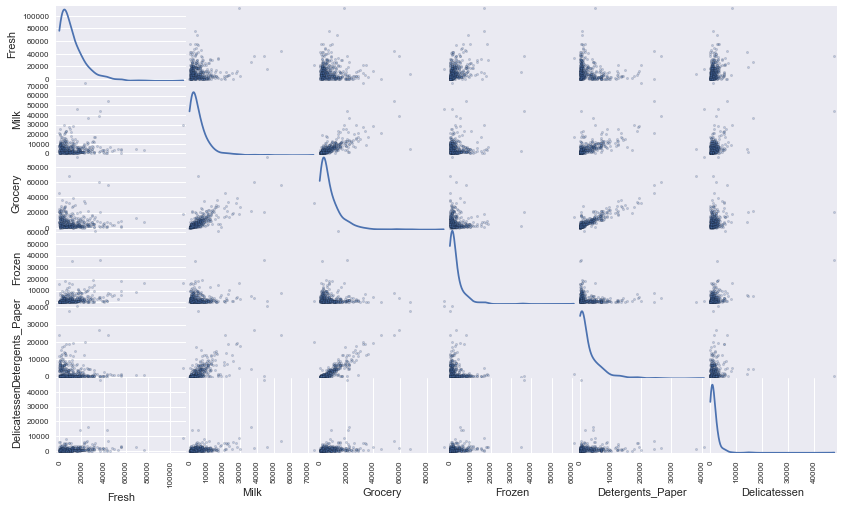

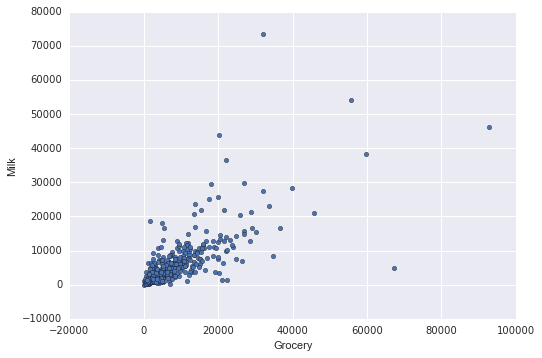

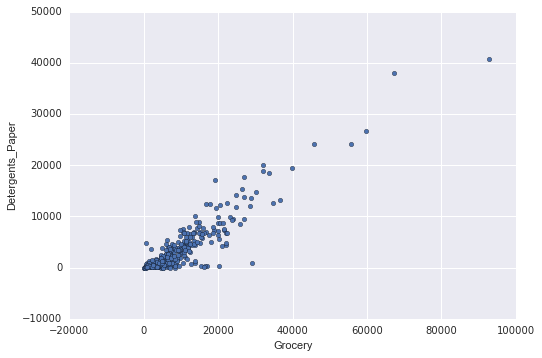

In [11]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
data.plot.scatter(x = 'Grocery', y = 'Milk')
data.plot.scatter(x = 'Grocery', y = 'Detergents_Paper')



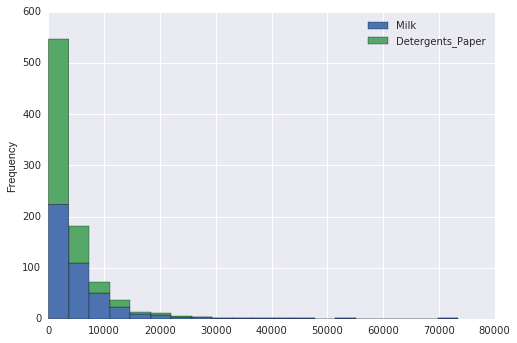

In [12]:
data[['Milk','Detergents_Paper']].plot.hist(stacked=True, bins=20)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Yes, from the above plots I can see Milk and Detergents have kind of a linear relationship with Grocery. This confirms my suspicision that 'Grocery' is not so relevant for identifying customer's spending habits. The data points for these two features are not normally distributed as its evident from the above stacked histogram plot (and also in the scatter matrix plots above). Most of the datapoints for 'Milk' fall below 7000(more or less) spent mark and for 'Detergents_Paper' most of the data points fall below 4000(more or less) spent mark.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12119e9d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11edcdc90>]], dtype=object)

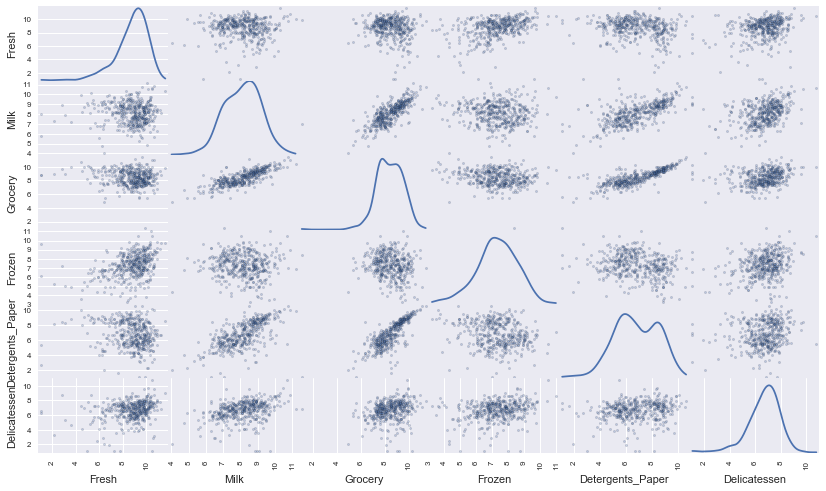

In [13]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')




### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [14]:
# Display the log-transformed sample data
display(log_samples)
#display(log_data)


Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
0  8.861775  9.191158   9.166179  7.474205          8.099554      7.482119
1  9.863655  7.517521   7.413367  9.011279          5.855072      6.180017
2  7.098376  9.214731  10.012073  7.462215          9.444463      8.051022

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [27]:
# For each feature find the data points with extreme high or low values
outliers_dict  = {}
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = float(1.5*(Q3-Q1))
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    a = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(a)
    
    
    for i in a.index.get_values():
        if i not in outliers_dict:
            outliers_dict[i] = 1
        else:
            outliers_dict[i] = outliers_dict[i] + 1
              
    
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers = []

for key in outliers_dict:
    if outliers_dict[key] > 1:
        outliers.append(key)

#print outliers

#outliers = [128, 154, 65, 66, 75]
# Remove the outliers, if any were specified

bad_data = pd.DataFrame(data.loc[outliers], columns = data.keys())

print "outlier original data: \n"
print bad_data


bad_data_log = pd.DataFrame(log_data.loc[outliers], columns = data.keys())

print "\n"
print "outlier log transformed data: \n"
print bad_data_log

good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

#withiut removing the outliers
#good_data = log_data

#display(good_data)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

outlier original data: 

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
128    140   8847     3823     142              1062             3
154    622     55      137      75                 7             8
65      85  20959    45828      36             24231          1423
66       9   1534     7417     175              3468            27
75   20398   1137        3    4407                 3           975


outlier log transformed data: 

        Fresh      Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
128  4.941642  9.087834   8.248791  4.955827          6.967909      1.098612
154  6.432940  4.007333   4.919981  4.317488          1.945910      2.079442
65   4.442651  9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225  7.335634   8.911530  5.164786          8.151333      3.295837
75   9.923192  7.036148   1.098612  8.390949          1.098612      6.882437


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Yes, there are five data points - 128, 154, 65, 66, 75 which are considered outliers for more than one feature. Yes, I would remove these data points as they are considered outilers for multiple features, an extreme value for a single feature for a customer may come up -- may be its a data entry error or whatever may be the reason, the non-linear log trasformation of the dataset might put the data point in the right scale avoiding skewness. But having extreme data points for more than one features for the same cutomer might lead to an overfitted model.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[-0.16746374  0.40143866  0.43811142 -0.17820975  0.75142613  0.14987105]


[ 0.68593522  0.16722783  0.07072902  0.50054207  0.04244398  0.49414702]


[-0.67738927  0.04020501 -0.01953317  0.31504299 -0.21170161  0.62855082]
The cummulative variance for four dimensions: 0.931090
0.44302504749
0.263792183317
0.12306380111


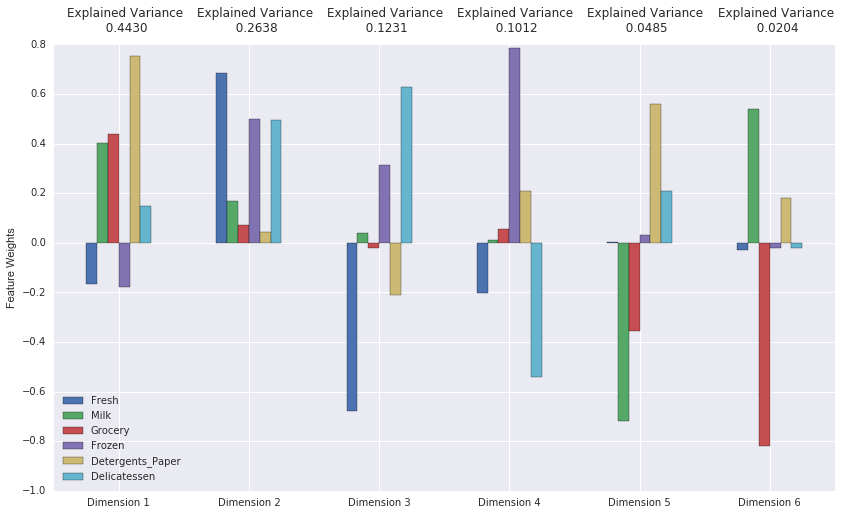

In [28]:
from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)
#pca = None
# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)


print pca.components_[0]
print "\n"
print pca.components_[1]
print "\n"
print pca.components_[2]

cum_sum = 0
for i in range(0,4):
        cum_sum = cum_sum + pca.explained_variance_ratio_[i]
    
print "The cummulative variance for four dimensions: %f" %cum_sum

print(pca.explained_variance_ratio_[0]) 
print(pca.explained_variance_ratio_[1]) 
print(pca.explained_variance_ratio_[2]) 
#print pca.components_



### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

70% of the variance in data is explained in total by the first and second principal components. 93.1% of the variance in data is explained by the first four principal components.

The first Principal Component explains 44% of the variance in customer spending with positive loadings on Detergents_paper, Grocery, Milk and Delicatessen --- meaning an increase in spending is explained by increase spendings on Detergents_paper(maximum increment explained), Grocery, Milk and Delicatessen and decrease spendings on Fresh and Frozen. Detergents_paper has the highest positive co-relation value - .75 followed by Milk and Grocery. We see that the first principal component correlates most strongly with Detergents_paper. We could state that based on the correlation of 0.751 the 1st principal component is primarily a measure of Detergents_paper followed by Milk and Grocery. I would guess customers like Retail store would score high on this Dimension.

The second Principal Component explains 26% of the variance in customer spending with positive loadings on all the product categories --- meaning an increase in spending is explained by increase spendings on Fresh (maximum increment explained), Detergents_paper, Milk, Grocery, Delicatessen and Frozen. Fresh has the highest positive co-relation value - .68 followed by Frozen and Delicatessen. We could state that the second principal component is primariy a measure of Fresh followed by Frozen and Delicatessen. I would guess customers such as Restaurent / Cafe would score high on this Dimension as they tend to buy for Fresh produce etc.

The 3rd Principal Component explains 12% of the variance in customer spending with positive loadings on Delicatessen(maximum increment explained), Frozen and Milk --- meaning an increase in spending is explained by increase spendings on and Delicatessen, Frozen, Milk  and decrease spendings on Fresh(maximum decrement explained), Grocery and Detergents_paper.Delicatessen has the highest positive co-relation value - '.628' and and Fresh has the higest negative corelation value - '-.677'. We could state that the second principal component is primarily a measure of Delicatessen and negative measurement on Fresh. I would guess stores which sell food which are already prepared/ processed as well as imported food (shops that sell sandwiches, sodas, imported beer etc) such as stores in gas stations or even stores which sell imported food and does not sell any fresh produce etc would score high on this dimension.

The 3rd Principal Component explains 10% of the variance in customer spending with positive loadings on Grocery, Detergents_paper, Frozen and Milk --- meaning an increase in spending is explained by increase spendings on Grocery, Detergents_paper, Frozen(maximum increment explained) and Milk and decrease spendings on Fresh and Delicatessen(maximum decrement explained).Frozen has the highest positive co-relation almost 0.8 and Delicatessen has highest negative corelation almost -0.6. So, stores which mostly sell Frozen foods and no imported delicatessen would score high in this dimension. E.g. Walmart

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [17]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))
#display(log_samples)
#display(good_data)


Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       1.8004       0.8698      -0.2128       0.0079      -0.1188   
1      -1.9628       1.1546       0.3726       1.1302       0.2370   
2       3.5901       0.0646      -1.4438       0.3947       0.4371   

   Dimension 6  
0      -0.2314  
1      -0.2684  
2       0.1331

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [29]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)


# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [30]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       1.7887       0.8123
1      -1.9745       1.1263
2       3.5620      -0.0014

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** 
Advantages to using K-Means:

1) Fast, robust and easier to understand.

2) Relatively efficient- Linear time complexity O(n). 

3) It works really well with large datasets.

4) Gives best result when data set are distinct or well separated from each other.

5) The algorithm is guaranteed to converge to a local optimum.

6) With a large number of variables, K-Means may be computationally faster 


Advantages to using GMM:
- K means is based on hard assigment. K means will start with the assumption that a given data point belongs to one cluster. At a given point in the algorithm, it is certain that a point belongs to a say red cluster. In the next iteration, this belief might be revised  we will assert that it belongs to the green cluster. In each iteration, we are absolutely certain as to which cluster the point belongs to. This is the "hard assignment". But say there is 70% chance it belongs to the red cluster, but 10% chance its in green, 20% chance it might be blue. That's a soft assignment. The Mixture of Gaussian model helps to express this uncertainty. It starts with some prior belief about how certain we are about each point's cluster assignments. As it goes on, it revises those beliefs. But it incorporates the degree of uncertainty we have about our assignment.

Sources:
https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm
https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian
http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm


Although it seems like K means has some serious disadvtanges such as :

1) The learning algorithm requires a prior selection of a number of cluster centers.
2) If  there are two highly overlapping data points then k-means will not be able to resolve that there are two clusters.
3) Based on the initialization of the centroids K-means may converge to a local optimum which may not be the global mimimum or a cluster globally - which means for a fixed dataset initializing with the same number of clusters K -means may not arrive at the same result (with different initial locations of the centroids) - Low capability to pass the local optimum.
4) fails for categorical data.
5) Unable to handle noisy data and outliers.
6) Algorithm fails for non-linear data 
7) Doesn't work well with non-circular cluster shape -- number of cluster and initial seed value need to be specified beforehand

PCA performed above tells us that maximum variance in the data is explained by the 1st two principal components(70% of variance explained). Research says there is strong relationship between PCA and K means clustering. It is proved through some research that PCA eigenvectors should be very good initializers for K-Means. It is proved in the paper quoted below that principal components are the continuous solutions to the discrete cluster membership indicators for K-means clustering. Few other points to be noted in favour of K means:

1) SKLearn implementation of K means has the parameter n_init:
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

2) K means work well on circular shapes/ linear relationship between the features. Its obvious from the above scatter matrix that the features have either circular or linear relationships among one another.

3) K means works well if there are no outliers or noise in the data. We have already removed the outliers using the Tukey's Method for identfying outliers.

Sources:
http://ranger.uta.edu/~chqding/papers/KmeansPCA1.pdf
http://stackoverflow.com/questions/25194086/how-does-pca-gives-centers-for-the-kmeans-algorithm-in-scikit-learn
http://stats.stackexchange.com/questions/157621/how-pca-would-help-the-k-mean-clustering-analysis
https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm
https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html



### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [34]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn import metrics
for k in range(2, 3):
     kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20)

#class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)
     clusterer = kmeans.fit(reduced_data)

# TODO: Predict the cluster for each data point
     preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
     centers = clusterer.cluster_centers_ 

# TODO: Predict the cluster for each transformed sample data point
     sample_preds = clusterer.predict(pca_samples)


# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
     score = metrics.silhouette_score(reduced_data, preds, metric='sqeuclidean')
     print 'for number of clusters= %d the silhoutte score= %f' % (k, score)

for number of clusters= 2 the silhoutte score= 0.596814


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

| Numer of clusters   | Silhoutte Score
| -------------       |:------------
|     2               | 0.596814
|     3               | 0.567261      
|     4               | 0.482123   
|     5               | 0.504348  
|     6               | 0.523091  

Out of these, 2 number of clusters has the best silhouette score

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

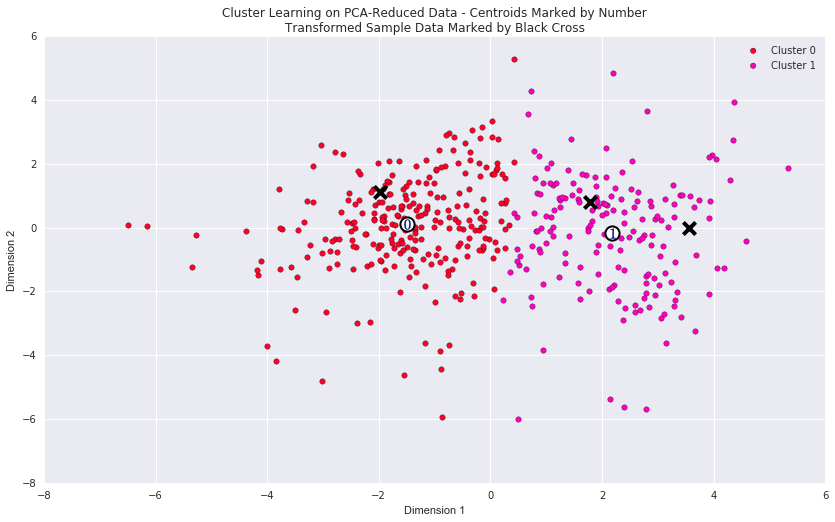

In [35]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [26]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)
#print centers
#print log_centers
#print true_centers

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
#print segments
#print data.keys()
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
display(data.describe())

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8994.0  1909.0   2366.0  2081.0             290.0         681.0
Segment 1  3570.0  7749.0  12463.0   900.0            4567.0         966.0

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** Here are the set of establishments the customer segments represent:

1) Segment 0: - Amount spent on Fresh is more than 50% of the population spent
              - Amount spent on Milk is within the 75% of the population spent
              - Amount spent on Grocery within the 75% of the population spent
              - Amount spent on Frozen is more than 50% of the population spent
              - Amount spent on Detergents_Paper spent within the 75% of the population spent 
              - Amount spent on Delicatessen is within the 50% of the population spent
              
2) Segment 1: - Amount spent on Fresh is within the 50% of the population spent
              - Amount spent on Milk is more than 75% of the population spent 
              - Amount spent on Grocery is more than 75% of the population spent
              - Amount spent on Frozen is within the 50% of the population spent
              - Amount spent on Detergents_Paper spent is more than 75% of the population spent
              - Amount spent on Delicatessen is more than 50 % of the population spent

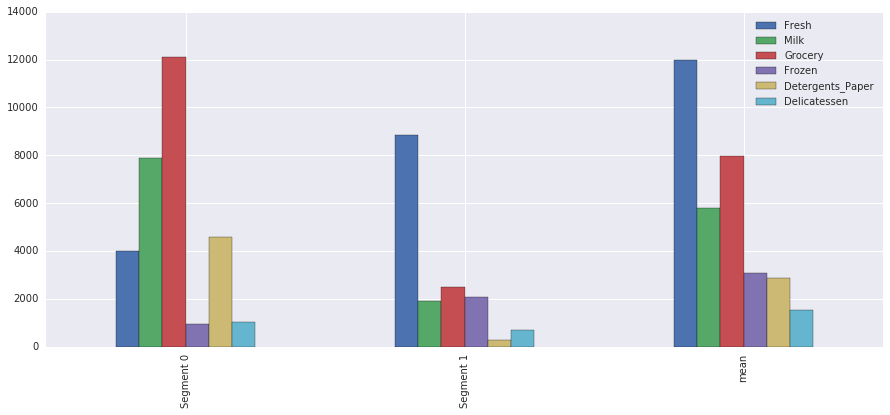

In [31]:
import seaborn as sns
true_centers = true_centers.append(data.describe().loc['mean'])
_ = true_centers.plot(kind='bar', figsize=(15,6))

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [210]:
display(samples)
display(data.describe())
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   7057   9810     9568    1762              3293          1776
1  19219   1840     1658    8195               349           483
2   1210  10044    22294    1741             12638          3137

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** As compared to Segment 0, Segment 1 spends more than majority of the population in 4 out of 6 products. If I would need to make a guess in terms of the Segment which would reach positively to the change in delivery service from 5 day to 3 days a week, it would be Segment 0 since Segment 1 spends more on most products compared to Segment 0, Segment 0 might be ok with a less frequent delivery service per week as it's need for most products is less than Segment 1. However, Segment 1 would be mostly affected by the change in the delivery service for 5 days to 3 days

My thoughts on how to perform the A/B testing:

There are two segments of customers - Segment 0 and Segment 1. Say variation A has the old delivery service i.e. 5 days a week. Variation B has the new delivery service i.e. 3 days a week. As explained above we can infer that Segment 0 would probably be ok with 3 days a week delivery service, as part of the A/B testing cycle we can implement Varitaion B on Segment 0 and keep varition A on segment 1. During the testing phase/cycle if we donot see any complains or receive positive responses from customers in segment 0, we can implement 3 days as service permanently with Segment 0. But if we see negative responses from segment 0, we will revert back the change in Segment 0 after the A/B testing phase. We can also do the A/B testing phase with Variation A in segment 0 and variation B implemented in segment 1, if dont see positive responses from segment 0, we will revert back or else we will keep it.  

So, we might have to perform two phases of A/B testing if we don't find the right segment(segment that responds positive;y to the 3 day delivery model) at the first phase.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**  We can train a supervised learning based classification (SVM, Decision tree etc..) model on the labeled data (we have engineered the customer segment / cluster using K-means) available with product spendings as the features and cutomer segment as the target and use the trained model to predict the label(customer segment)of the ten new customers for which we have the data for product spendings.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

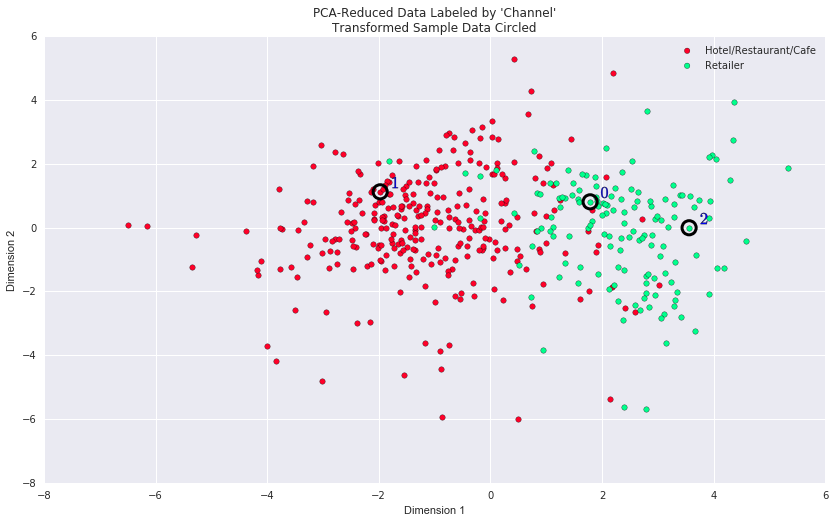

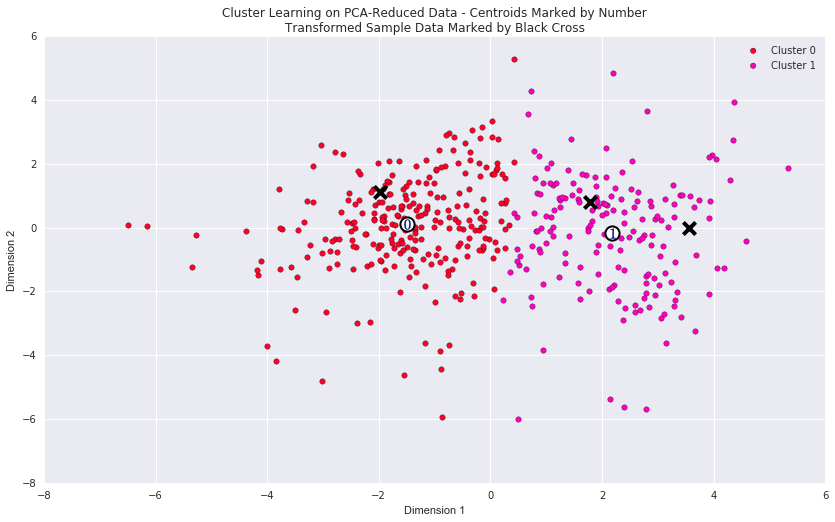

In [36]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The new clusters are not completely separated as there are points which overlap between the clusters as seen above. The Clustering algorithm and the clusters we chose built clearly separated clusters with no or few overlaps compared to the new one. It will be difficult or rather inaccurate to say that a customer segment would be purely 'Retailers' or 'Hotels/Restaurants/Cafes' by the new distribution. If I do a comparison between my clusters and the new clusters, we see in our case, customers in 'Cluster 0' mostly spend less compared to customers in 'Cluster 1'. 'Hotel/Restaurent/Cafe' cluster might resemble 'Cluster 0' and 'Retail' store cluster might resemble 'Cluster 1'- In my case Cluster 0 spends less for most of the products compared to Cluster 1, we might slightly guess 'Cluster 0' in our case could actually be a 'Restaurent or Hotel or Cafe' compared to a Retail Store (Cluster 1) which would probably spend more compared to a 'Restaurent / Hotel / Cafe'. But again the new clusters are not completely pure as compared to ours so my inference would not be completely appropriate. One more interesting analogy between the two clusterig techniques is with the location of the sample points. Two sample points belong to Cluster 1 and one to Cluster 0 in my case. In the new clustering as well, two sample points belong to 'Retail' and one to 'Restaurent / Hotel / Cafe'


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.